In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
OUTPUT_DATA = False

In [2]:
#fileName = "sample.csv"
fileName = "train.csv"
#fileName = "validation.csv"
scriptDir = os.getcwd() # Assumes that script is executed from its actual location
relPath = r"../data/" # And data is located in a 'data' folder in the same parent directory as 'code' folder
relPathOutput = r"../output/"
filePath = os.path.join(scriptDir, relPath,fileName)
outputFolderPath = os.path.join(scriptDir, relPathOutput)

In [3]:
# Load data into pandas dataframe
df = pd.read_csv(filePath, sep=',',header=0, quotechar='"')

In [35]:
# Split 'useragent' field into 'OS' and 'browser'
dfn = df['useragent'].str.split('_', expand = True)
df['OS'] = dfn[0]
df['browser'] = dfn[1]
# Create slotsize field
df['slotsize'] = df['slotheight'] * df['slotwidth']

In [36]:
# Descriptive statistics
dfDesc = df.describe(include='all')
dfUnqCnt = df.nunique().to_frame().transpose().rename({0: 'unique_cnt'}, axis='index')
dfNaN = df.isna().sum().to_frame().transpose().rename({0: 'NaN'}, axis='index')
frames = [dfDesc, dfUnqCnt, dfNaN]
dfDesc = pd.concat(frames)

if OUTPUT_DATA: dfDesc.to_csv(os.path.join(outputFolderPath, 'descStats.csv'))
dfDesc #show

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,OS,browser,slotsize
count,2.430981e+06,2.430981e+06,2.430981e+06,2430981,2430981,2430981,2430981,2.430981e+06,2.430981e+06,2.381152e+06,...,2.430981e+06,2430981,2.430981e+06,2.430981e+06,1925991,2.430981e+06,1933502,2430981,2430981,2.430981e+06
unique,NaN,NaN,NaN,2430981,2342677,38,503975,NaN,NaN,NaN,...,NaN,131,NaN,NaN,18,NaN,744035,6,9,NaN
top,NaN,NaN,NaN,a35dcdf864d15f5fe72cd0eba0003670f8c4180e,5ac7ec84bb700b7a6bd1c57b1ae7c269af65850b,windows_ie,113.106.102.*,NaN,NaN,NaN,...,NaN,44966cc8da1ed40c95d59e863c8c75f0,NaN,NaN,bebefa5efe83beee17a3d245e7c5085b,NaN,10063,windows,ie,NaN
freq,NaN,NaN,NaN,1,13,1461665,3455,NaN,NaN,NaN,...,NaN,147811,NaN,NaN,492353,NaN,89991,2314896,1461700,NaN
mean,7.375623e-04,2.888556e+00,1.348925e+01,NaN,NaN,NaN,NaN,1.493833e+02,1.543295e+02,2.109685e+00,...,2.671783e+01,NaN,2.729620e+02,7.815142e+01,NaN,2.840736e+03,NaN,NaN,NaN,7.699868e+04
std,2.714809e-02,2.055223e+00,6.567105e+00,NaN,NaN,NaN,NaN,1.020631e+02,1.033093e+02,8.764370e-01,...,3.704444e+01,NaN,2.891153e+01,5.984636e+01,NaN,7.841990e+02,NaN,NaN,NaN,1.726495e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,NaN,2.270000e+02,0.000000e+00,NaN,1.458000e+03,NaN,NaN,NaN,1.404000e+04
25%,0.000000e+00,1.000000e+00,1.000000e+01,NaN,NaN,NaN,NaN,7.900000e+01,7.900000e+01,1.000000e+00,...,0.000000e+00,NaN,2.410000e+02,3.300000e+01,NaN,2.259000e+03,NaN,NaN,NaN,6.552000e+04
50%,0.000000e+00,3.000000e+00,1.400000e+01,NaN,NaN,NaN,NaN,1.460000e+02,1.520000e+02,2.000000e+00,...,5.000000e+00,NaN,2.940000e+02,6.800000e+01,NaN,3.358000e+03,NaN,NaN,NaN,7.500000e+04
75%,0.000000e+00,5.000000e+00,1.900000e+01,NaN,NaN,NaN,NaN,2.160000e+02,2.220000e+02,3.000000e+00,...,5.000000e+01,NaN,3.000000e+02,9.900000e+01,NaN,3.427000e+03,NaN,NaN,NaN,9.000000e+04


# CTR
#### (the mean would have been equivalent in this dataset)

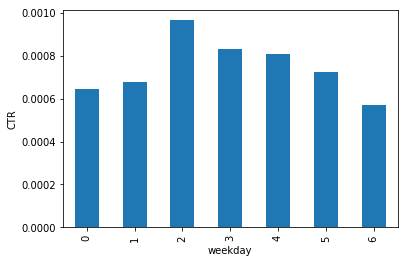

In [37]:
# CTR by weekday
df.groupby('weekday')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_by_weekday.png'));

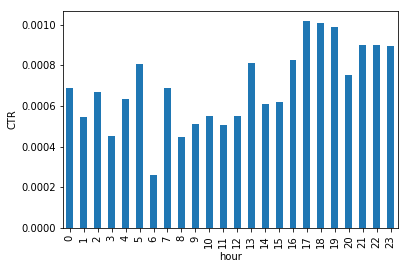

In [38]:
# CTR by hour
df.groupby('hour')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_by_hour.png'));

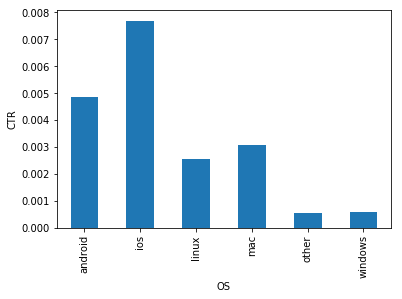

In [39]:
# CTR by OS
df.groupby('OS')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_by_OS.png'));

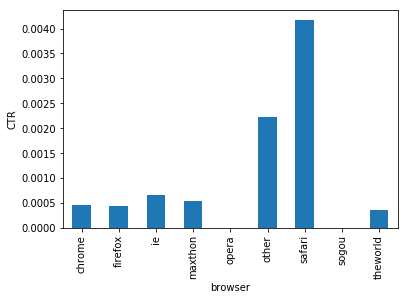

In [40]:
# CTR by Browser
df.groupby('browser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_by_browser.png'));

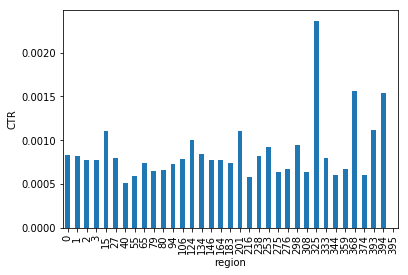

In [41]:
# CTR by region
df.groupby('region')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_by_region.png'));

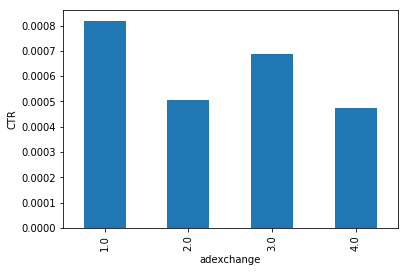

In [42]:
# CTR by adexchange
df.groupby('adexchange')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_by_adexchange.png'));

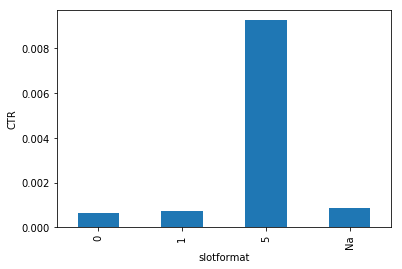

In [43]:
# CTR by slotformat
df.groupby('slotformat')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_by_slotformat.png'));

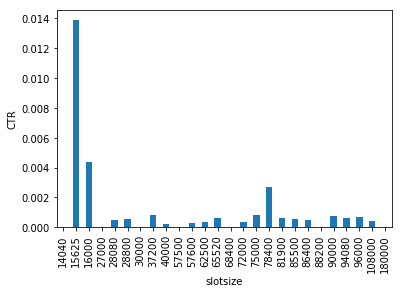

In [44]:
# CTR by slotsize
df.groupby('slotsize')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_by_slotsize.png'));

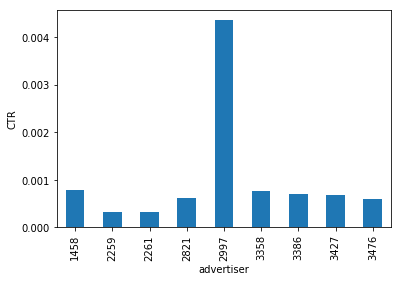

In [45]:
# CTR by advertiser
df.groupby('advertiser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar')
plt.ylabel('CTR');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_by_advertiser.png'));

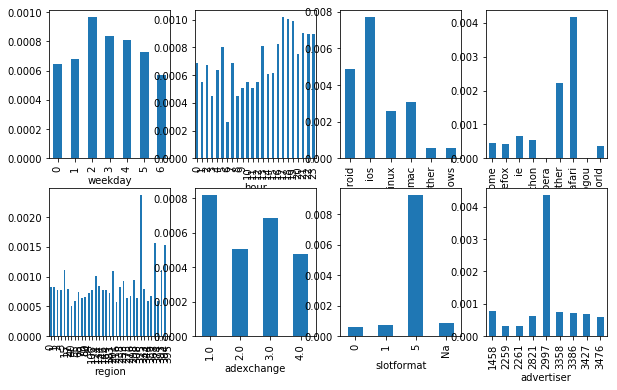

In [46]:
# Multi-figure version
# TODO requires some work to format
fig, axes = plt.subplots(2, 4, figsize=(10,6))
df.groupby('weekday')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[0, 0])
df.groupby('hour')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[0, 1])
df.groupby('OS')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[0, 2])
df.groupby('browser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[0, 3])
df.groupby('region')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[1, 0])
df.groupby('adexchange')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[1, 1])
df.groupby('slotformat')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[1, 2])
df.groupby('advertiser')['click'].apply(lambda x: x.sum() / x.count()).plot(kind='bar', ax=axes[1, 3])
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'CTR_multi.png'));

In [6]:
bins = pd.cut(df['payprice'], 20)

In [21]:
df2 = df.groupby(bins)['payprice'].agg({'click': ['count', 'sum'], 'payprice': ['sum']})

C:\Users\matth\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [22]:
df2
# TODO how to plot?
# TODO normalise by the price i.e. what's the cost per click
# TODO sum payprice where click = 1 (or adjust payprice sum based on % clicks in that bin)

# WHY IS SUM OF CLICK GREATER THAN COUNT ???

click            payprice
                 count       sum       sum
payprice                                  
(-0.3, 15.0]    198827   1709535   1709535
(15.0, 30.0]    344987   7530446   7530446
(30.0, 45.0]    222242   8236038   8236038
(45.0, 60.0]    362449  19030279  19030279
(60.0, 75.0]    312984  21612195  21612195
(75.0, 90.0]    327711  26762033  26762033
(90.0, 105.0]   107834  10557352  10557352
(105.0, 120.0]   79510   8985639   8985639
(120.0, 135.0]   71257   9093118   9093118
(135.0, 150.0]   73284  10546449  10546449
(150.0, 165.0]   69503  10979949  10979949
(165.0, 180.0]   63860  11066899  11066899
(180.0, 195.0]   34491   6469067   6469067
(195.0, 210.0]   47314   9584055   9584055
(210.0, 225.0]   41058   8952024   8952024
(225.0, 240.0]   24498   5697103   5697103
(240.0, 255.0]   14454   3588453   3588453
(255.0, 270.0]   12821   3364132   3364132
(270.0, 285.0]   13513   3766182   3766182
(285.0, 300.0]    8384   2453660   2453660

In [34]:
df2['paidForWin'] = df2['payprice']['sum'] * df2['click']['count'] / df2['click']['sum']

In [35]:
df2['costPerWonClick'] = df2['paidForWin'] / df2['click']['count']

In [36]:
df2

click            payprice       tst paidForWin  \
                 count       sum       sum                        
payprice                                                          
(-0.3, 15.0]    198827   1709535   1709535  198827.0   198827.0   
(15.0, 30.0]    344987   7530446   7530446  344987.0   344987.0   
(30.0, 45.0]    222242   8236038   8236038  222242.0   222242.0   
(45.0, 60.0]    362449  19030279  19030279  362449.0   362449.0   
(60.0, 75.0]    312984  21612195  21612195  312984.0   312984.0   
(75.0, 90.0]    327711  26762033  26762033  327711.0   327711.0   
(90.0, 105.0]   107834  10557352  10557352  107834.0   107834.0   
(105.0, 120.0]   79510   8985639   8985639   79510.0    79510.0   
(120.0, 135.0]   71257   9093118   9093118   71257.0    71257.0   
(135.0, 150.0]   73284  10546449  10546449   73284.0    73284.0   
(150.0, 165.0]   69503  10979949  10979949   69503.0    69503.0   
(165.0, 180.0]   63860  11066899  11066899   63860.0    63860.0   
(180.0, 195.0]   34491   6469067   6469067   34491.0    34491.0   
(195.0, 210.0]   47314   9584055   9584055   47314.0    47314.0   
(210.0, 225.0]   41058   8952024   8952024   41058.0    41058.0   
(225.0, 240.0]   24498   5697103   5697103   24498.0    24498.0   
(240.0, 255.0]   14454   3588453   3588453   14454.0    14454.0   
(255.0, 270.0]   12821   3364132   3364132   12821.0    12821.0   
(270.0, 285.0]   13513   3766182   3766182   13513.0    13513.0   
(285.0, 300.0]    8384   2453660   2453660    8384.0     8384.0   

               costPerWonClick  
                                
payprice                        
(-0.3, 15.0]               1.0  
(15.0, 30.0]               1.0  
(30.0, 45.0]               1.0  
(45.0, 60.0]               1.0  
(60.0, 75.0]               1.0  
(75.0, 90.0]               1.0  
(90.0, 105.0]              1.0  
(105.0, 120.0]             1.0  
(120.0, 135.0]             1.0  
(135.0, 150.0]             1.0  
(150.0, 165.0]             1.0  
(165.0, 180.0]             1.0  
(180.0, 195.0]             1.0  
(195.0, 210.0]             1.0  
(210.0, 225.0]             1.0  
(225.0, 240.0]             1.0  
(240.0, 255.0]             1.0  
(255.0, 270.0]             1.0  
(270.0, 285.0]             1.0  
(285.0, 300.0]             1.0

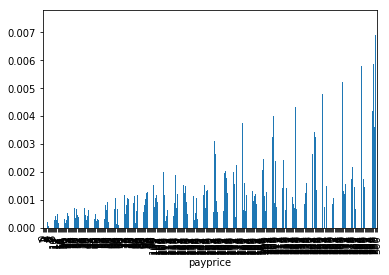

In [5]:
# TODO bucket price
df.groupby('payprice')['click'].apply(np.mean).plot(kind='bar')

# average cost-per-mille (CPM)

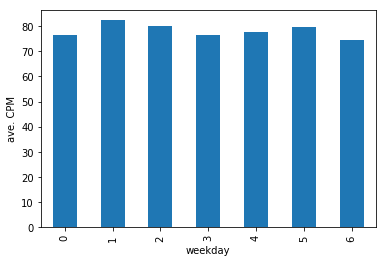

In [47]:
df.groupby('weekday')['payprice'].mean().plot(kind='bar')
plt.ylabel('ave. CPM');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'aCPM_by_weekday.png'));

In [48]:
# TODO repeat for other attributes

# effective cost-per-click (eCPC)

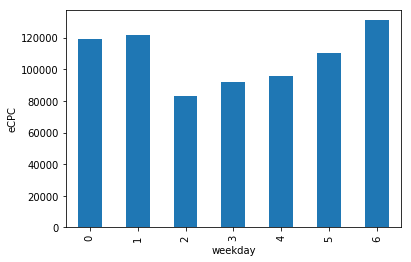

In [49]:
df2 = df.groupby('weekday').agg({'click': ['sum'], 'payprice': ['sum']})
df2['eCPC'] = np.where(df2['click'] == 0, df2['click'], df2['payprice'] / df2['click'])
df2['eCPC'].plot(kind='bar')
plt.ylabel('eCPC');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'eCPC_by_weekday.png'));

In [50]:
# TODO repeat for other attributes

# price

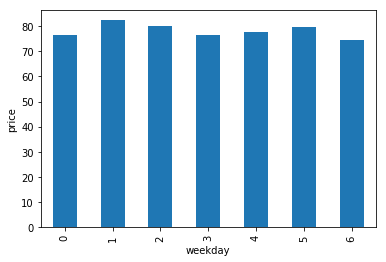

In [51]:
# Price by weekday
df.groupby('weekday')['payprice'].apply(np.mean).plot(kind='bar')
plt.ylabel('price');
if OUTPUT_DATA: plt.savefig(os.path.join(outputFolderPath, 'Price_by_weekday.png'));

In [52]:
# TODO repeat for other attributes

In [5]:
# look at user tags
usertagsRaw = np.array(df['usertag'])
usertagsSingle = dict()
for idx in range(len(usertagsRaw)):
    if type(usertagsRaw[idx]) != str:
        continue
    else:
        tags = str(usertagsRaw[idx]).split(',')
    
    for tag in tags:
        usertagsSingle[tag] = usertagsSingle.get(tag,0) + 1

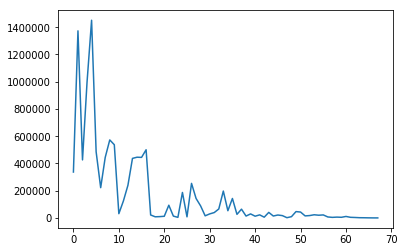

In [15]:
plt.plot(usertagsSingle.values()); # TODO change to bar, add x axis labels

In [ ]:
# how can I realte this to CTR?